# <font color="orange"> Unsupervised Learning </font>
->> The most common approaches to machine learning training are supervised and unsupervised learning 
<br>
->> Machine learning is a type of artificial intelligence that allows software applications to become more accurate at predicting outcomes over time, without being explicitly programmed to do so.
<br>
->> Supervised machine learning requires the data scientists to provide input and output data, with the goal of the algorithm eventually predicting the correct outputs based on the given input. This type of system is ideal for binary classification, multi-class identification, regression modeling, and ensembling.
<br>
->> Unsupervised machine learning, on the other hand, does not require labels and corresponding outputs to be provided. The algorithm instead uses unlabeled input data and identifies patterns in order to group data.  Unsupervised learning is typically used for clustering, anomaly detection, association mining, and dimensionality reduction. 
<br>
## <font color="purple"> Unsupervised Learning </font>
->> K-Means
<br>
->> Hierarchical  Cluster Analysis
<br>
->> Principal Component Analysis
# <font color="orange">K-Means</font>
->> The aim is splitting observations to subsets to their similarities, K-Means is a clustering method.
<br>
->> The aim of clustering methods is try to group observations or variables by using similarity matrixes. The generated subsets are expected homogenous to inside of them, and heterogenous to each other. 

<img src="./used_images/kmeans.png" width="600" height="600">
<br> 

### <font color="purple">Steps of K-Means</font>
->> Number of Clusters are determined
<br>
->> K number of center is selected randomly
<br>
->> The distances to k-centers are calculated for every observation.
<br>
->> Every observation is assigned the closest center, it means cluster.
<br>
->> After assigning process, the center calculations are repeats for clusters.
<br>
->> This process continues to decided number of iteration, and the clusters are selected final cluster that summation of sum of mean squared errors minimum.
<br>
->> The aim is that making the similarity inside a cluster  maximum, the similarity between clusters  minimum.

### <font color="red">K-Means Implementation</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
df=pd.read_csv("./csv_files/USArrests.csv",index_col=0)

# Our aim is that splitting states to cluster to their criminal rates

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


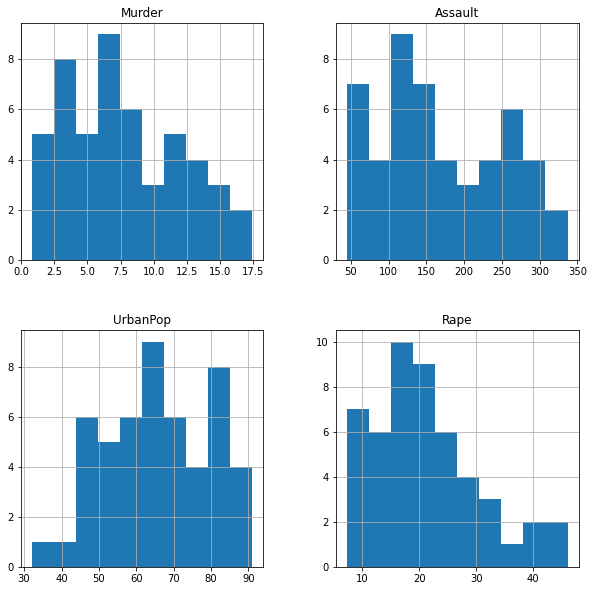

In [7]:
df.hist(figsize=(10,10));

In [8]:
kmeans=KMeans(n_clusters=4).fit(df)

In [9]:
kmeans.n_clusters

4

In [10]:
kmeans.cluster_centers_ # centers of clusters 

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [11]:
kmeans.labels_  # Labels of clusters 

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 2, 1,
       3, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 3, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0,
       3, 2, 2, 3, 3, 2])

### <font color="purple">Visualisation of Clusters</font>
->> We select two variables, why ? because our aim is showing the clustering on two axis, but we have 4 variable.
<br>
->> If we have more than 2 variable, but we want to visualize them on two axis, we should degrade the dataset into two variable by using Principal Component Analysis (PCA). 


In [12]:
kmeans=KMeans(n_clusters=2).fit(df)

In [13]:
clusters=kmeans.labels_

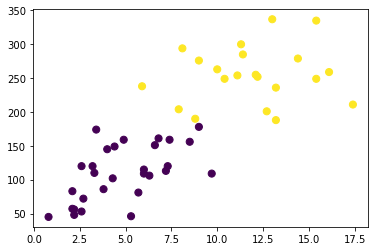

In [14]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=clusters,s=50,cmap="viridis");

In [15]:
centers=kmeans.cluster_centers_

In [16]:
centers

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

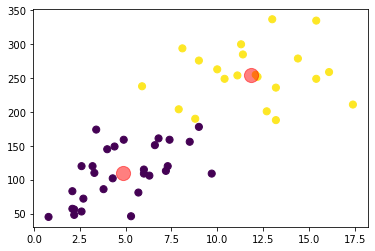

In [17]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=clusters,s=50,cmap="viridis")
plt.scatter(centers[:,0],centers[:,1],c="red",s=200,alpha=0.5);

### <font color="purple">Determining Optimum Cluster Value</font>

### <font color="red">Elbow Method</font>

In [18]:
df=pd.read_csv("./csv_files/USArrests.csv",index_col=0)

# Our aim is that splitting states to cluster to their criminal rates


ssd=[]

K=range(1,30)
for i in K:
    kmeans=KMeans(n_clusters=i).fit(df)
    ssd.append(kmeans.inertia_) # Distances of ever k

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


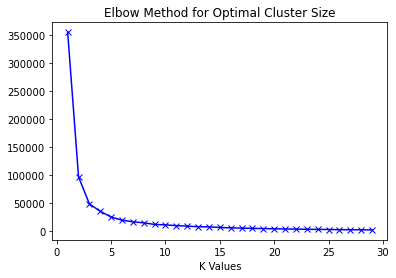

In [19]:
plt.plot(K,ssd,"bx-")
plt.xlabel("K Values")
plt.title("Elbow Method for Optimal Cluster Size");

In [20]:
!pip install yellowbrick # for alternative solution


Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'


In [21]:
from yellowbrick.cluster import KElbowVisualizer

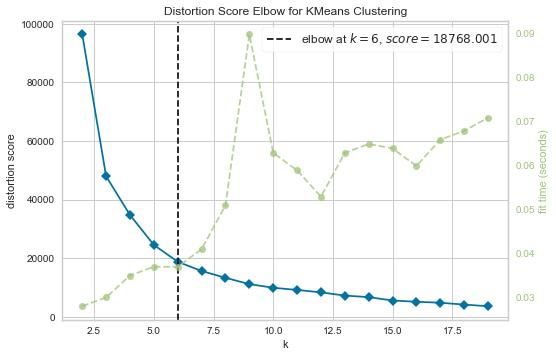

In [22]:
kmeans=KMeans()
visu=KElbowVisualizer(kmeans,k=(2,20)).fit(df)
visu.poof();

In [23]:
# final model
final_model=KMeans(n_clusters=4).fit(df)

In [24]:
clusters=final_model.labels_
centers=final_model.cluster_centers_

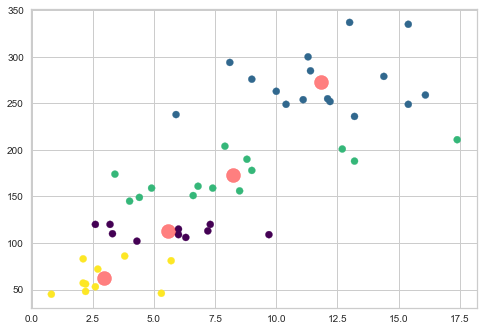

In [25]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=clusters,s=50,cmap="viridis")
plt.scatter(centers[:,0],centers[:,1],c="red",s=200,alpha=0.5);

In [26]:
centers

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [27]:
df["cluster_no"]=clusters

In [28]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_no
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


### <font color="red">When using Unsupervised algorithms, we should't directly accept the algorithm results, it cant be always true, it is absolutely the a human factor is needed to interfered to efformation</font>

# <font color="orange"> Hierarchical Cluster Analysis </font>
->> The aim is splitting obersvations to subsets to their similarities like K-means
<br> 
->> The difference is when observations is wanted to split more, in this situation we can use Hierarchical Cluster Methods.
<br> 
->> In K-Means , we could split 3 or 4 subsets, in this method except 3 or 4 subsets, we can split this 3 or 4 subsets into subsets, too.
<br>
<img src="./used_images/hie.png" width="600" height="800">
<br>
->> <b>Divisive Splitter</b>, first of all it splits 2 sub cluster, then this generated clusters are splitted into clusters which are not similar, this process continues until getting number of observartion's of clusters. It means, if we have 1000 observations, it is splitted until getting 1000 clusters.
<br>
->> <b>Agglomerative Process</b> is reverse of Divisive Process, it merges seperated clusters.
<br>
### <font color="blue">Steps of Agglomerative Process</font>
->> At the beginning, we have clusters as much as observations.
<br>
->> The two similar observation is found in dataset
<br>
->> This two point are gathered, and generated a new one. It means, the residual dataset is consisted of on the first merged point/s
<br>
->> This process continues until getting the observations is gathered on one cluster. These are merged to their similarities.
<br>
->> The closest point are determine by using distance measurements like euclid distance, manhattan distance and correlation, etc..
### <font color="green">Steps of Divisive Process</font>
->> At the beginning, we have 1 cluster, and this is our dataset.
<br>
->> The dataset splits 2 subsets.
<br>
->> Then 2 subsets are splitted into non-similar subsets.
<br>
->> This process continues until getting subsets as much as observations.
<br>
## <font color="purple">Difference between Clustering Methods and Decision Trees</font>
<br> 
->> In hierarchical methods, the number of clusters is determined by looking at the dendrogram results, in non-hierarchical methods, the number of clusters is determined before applying. (K-Means)
<br>
->> In hierarchical methods, we can do cluster process on both observations and variables, in non-hierarchical methods, only observations  can be clustered.
<br>
->> The difference from Decision Trees, while decision trees do their splitting process to target variable, since clustering methods dont have dependent variable/s, the observations are clustered that  the distance calculations are done above independent variables.
<br>

### <font color="red"> Hierarchical Cluster Analysis Implementation</font>

In [29]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [30]:
df=pd.read_csv("./csv_files/USArrests.csv",index_col=0)


In [31]:
hc_complete=linkage(df,method="complete") # these objects are used for creating dendrograms
hc_average=linkage(df,method="average") 
# hierarchical clustering is done

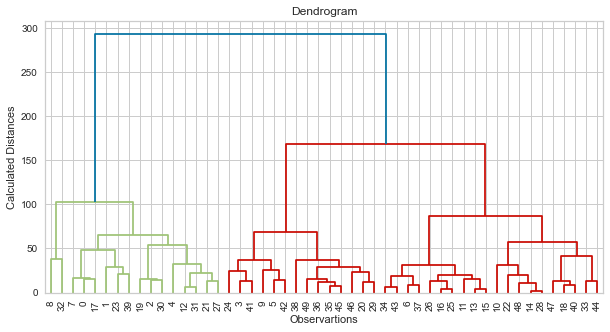

In [32]:
plt.figure(figsize=(10,5))
plt.title("Dendrogram")
plt.xlabel("Observartions")
plt.ylabel("Calculated Distances")
dendrogram(hc_complete,leaf_font_size=10);

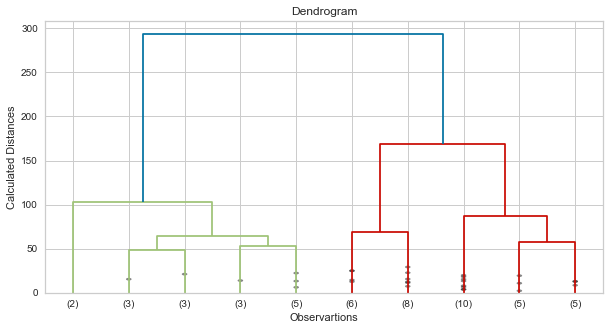

In [33]:
plt.figure(figsize=(10,5))
plt.title("Dendrogram")
plt.xlabel("Observartions")
plt.ylabel("Calculated Distances")
dendrogram(hc_complete,leaf_font_size=10,truncate_mode="lastp",p=10,show_contracted=True); # p= number of determined clusters 

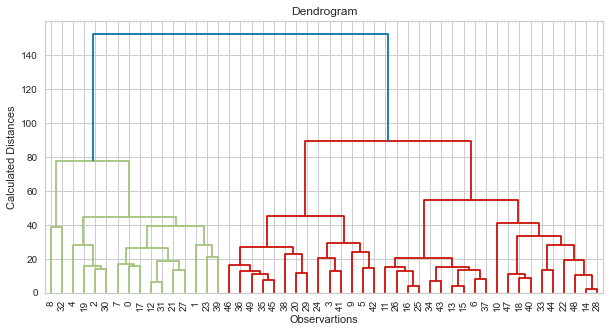

In [34]:
plt.figure(figsize=(10,5))
plt.title("Dendrogram")
plt.xlabel("Observartions")
plt.ylabel("Calculated Distances")
dendrogram(hc_average,leaf_font_size=10);

# <font color="orange"> Principal Component Analysis (PCA)</font> 
->> The main idea is, the multiple variable data's specification can be represented with less variable/s.
<br>
->> On the other hand, it means decreasing the size of variables by taking a risk of losing less information.
<br>
->> Lets assume that we have 100 variables, and here we want to represent the dataset by using 2 varibles or degrading to 2 variables.
<img src="./used_images/pca.png" width="600" height="700">
<br>
->> If we want to visualise our dataset after clustering, we cant do this by having 100 variables, we should degrade it to 2.
<br>
->> <b> The Principal Componen Analysis generally used some problems in image processing and regression model.</b> Especially, when regression model has more variables, and if some variables are related to each other, there can raise a multiple linear regression problem.
<br>
->> If we use PCA on these problems, we can remove multiple linear regression problem between related variables. After degrading process, there wont be correlation between variables.
<br>
->> By finding 	eigenvector of covariance and correlation matrices, this problem is solved.

### <font color="red"> Principal Component Analysis (PCA) Implementation</font> 

In [42]:
from sklearn.preprocessing import StandardScaler

In [39]:
# Our aim is representing this dataset by using less variables
df=pd.read_csv("./csv_files/Hitters.csv")._get_numeric_data()
df.dropna(inplace=True)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [43]:
# Before pca process we should do standardization process
df=StandardScaler().fit_transform(df)

In [47]:
df[:1]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292,
        -0.0975271 ,  1.3978935 ,  0.3467905 ,  0.1743734 , -0.0029198 ,
        -0.12167086,  0.25896561,  0.43533435,  1.22149851, -0.52319133,
         0.21335208, -0.1353126 ]])

In [48]:
# After this process we can use pca process to degrading 2 varibles
from sklearn.decomposition import PCA

In [55]:
pca=PCA(n_components=2)
pca_fit=pca.fit_transform(df)

In [56]:
component_df=pd.DataFrame(data=pca_fit,columns=["first_component","second_component"])

In [57]:
component_df.head() # We have represented the variance of our dataset by degrading 2 variables of the same dataset.

,first_component,second_component
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674


In [58]:
pca.explained_variance_ratio_ # This shows variability of dataset as % for each component

array([0.45245466, 0.24246801])

In [59]:
pca.components_  # all components, here we defined (2)

array([[ 0.19506377,  0.19410007,  0.19690453,  0.19491272,  0.22956638,
         0.20673717,  0.271085  ,  0.31970454,  0.32077315,  0.30810145,
         0.32761493,  0.32977446,  0.30573146,  0.08303783,  0.00159189,
        -0.00529271,  0.24914187],
       [-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
        -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
         0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
        -0.20978299, -0.05452611]])

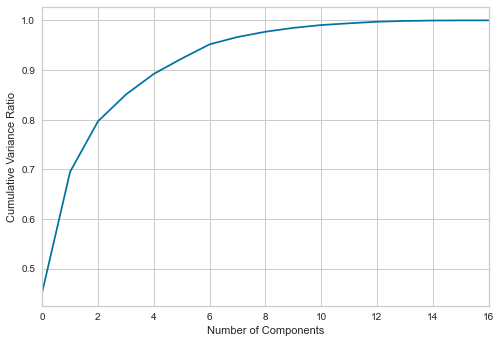

In [78]:
# to find optimum component number
pca=PCA().fit(df) #it creates components as much as observations
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Ratio")
plt.xlim((0,16));

In [67]:
pca.explained_variance_ratio_.cumsum()

array([0.45245466, 0.69492267, 0.79661947, 0.85055387, 0.89216822,
       0.92298014, 0.95167354, 0.96643244, 0.97707042, 0.9848601 ,
       0.99058665, 0.99407848, 0.99724583, 0.99881851, 0.99964648,
       0.9999293 , 1.        ])

In [68]:
# final model
pca=PCA(n_components=3)
pca_fit=pca.fit_transform(df)

In [69]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])